In [2]:
 # # # # # # # # # # # # # # # # # # # # # # # # #

Covid-19 project

In [3]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')

%matplotlib inline

In [4]:
# loading datasets
confirmed_cases=pd.read_csv('time_series_covid_19_confirmed.csv')

In [5]:
deaths_reported=pd.read_csv('time_series_covid_19_deaths.csv')

In [6]:
recovered_cases=pd.read_csv('time_series_covid_19_recovered.csv')

In [7]:
#display head
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26


In [8]:
confirmed_cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,5,6
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [9]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [10]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,99,112,131,135,150,166,179,188,188,207
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,283,302,314,327,345,356,385,394,403,410
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,846,894,1047,1099,1152,1204,1355,1408,1479,1508
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,191,205,235,248,282,309,333,344,344,344
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [11]:
#all columns using keys()
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [12]:
#extract only date columns
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]

In [13]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]

In [14]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [15]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,0,0,0,0,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,0,0,0,0,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,0,0,0,0,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,0,0,0,0,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,0,0,0,0,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26


In [16]:
#total C,D,R cases and append to 4 empty lists.
#total mortality rate death_sum/confirmed cases.

dates=confirmed.keys()
world_cases=[]
total_deaths=[]
moratlity_rate=[]
total_recovered=[]

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    moratlity_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [17]:
confirmed_sum 

2971475

In [18]:
 death_sum

206542

In [19]:
recovered_sum

865733

In [20]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242570,
 272208,
 304507,
 336953,
 378231,
 418041,
 467653,
 529591,
 593291,
 660693,
 720140,
 782389,
 857487,
 932475,
 1013326,
 1095698,
 1175857,
 1249484,
 1321131,
 1396092,
 1479804,
 1565278,
 1657526,
 1735650,
 1834721,
 1904838,
 1975195,
 2055057,
 2151421,
 2239144,
 2316716,
 2400078,
 2471247,
 2548091,
 2623049,
 2707728,
 2809499,
 2896744,
 2971475]

In [21]:
#convert into numpy array

days_since_1_22 =np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [22]:
days_since_1_22


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [23]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97886],
       [ 101801],
       [ 105847],
       [ 109821],
       [ 113590],
       [ 118620],
       [ 125875],
       [ 128352],
       [ 145205],
       [ 156101],
       [ 167454],
       [ 181574],
       [ 1

In [24]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3348],
       [  3460],
       [  3558],
       [  3802],
       [  3988],
       [  4262],
       [  4615],
       [  4720],
       [  5404],
       [  5819],
       [  6440],
       [  7126],
       [  7905],
       [  8733],
       [  9867],
       [ 11299

In [25]:
total_recovered

array([[    28],
       [    30],
       [    36],
       [    39],
       [    52],
       [    61],
       [   107],
       [   126],
       [   143],
       [   222],
       [   284],
       [   472],
       [   623],
       [   852],
       [  1124],
       [  1487],
       [  2011],
       [  2616],
       [  3244],
       [  3946],
       [  4683],
       [  5150],
       [  6295],
       [  8058],
       [  9395],
       [ 10865],
       [ 12583],
       [ 14352],
       [ 16121],
       [ 18177],
       [ 18890],
       [ 22886],
       [ 23394],
       [ 25227],
       [ 27905],
       [ 30384],
       [ 33277],
       [ 36711],
       [ 39782],
       [ 42716],
       [ 45602],
       [ 48228],
       [ 51170],
       [ 53796],
       [ 55865],
       [ 58358],
       [ 60694],
       [ 62494],
       [ 64404],
       [ 67003],
       [ 68324],
       [ 70251],
       [ 72624],
       [ 76034],
       [ 78088],
       [ 80840],
       [ 83312],
       [ 84975],
       [ 87420

In [26]:
#future for 10 days

days_in_future =10
future_forecast =np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [27]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [28]:
# int to datetime (good visualisation)

start='1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [29]:
# for visualisation with 26th April.

latest_confirmed= confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries= recovered_cases[dates[-1]]

In [30]:
latest_confirmed

0      1531
1       726
2      3382
3       738
4        26
       ... 
259       1
260       6
261       6
262       4
263       1
Name: 4/26/20, Length: 264, dtype: int64

In [31]:
latest_deaths

0       50
1       28
2      425
3       40
4        2
      ... 
259      0
260      0
261      0
262      0
263      0
Name: 4/26/20, Length: 264, dtype: int64

In [32]:
latest_recoveries

0       207
1       410
2      1508
3       344
4         6
       ... 
245       0
246       0
247       5
248       0
249       1
Name: 4/26/20, Length: 250, dtype: int64

In [33]:
#unique countries
unique_countries= list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [34]:
#calculate total no. of conf cases by each country

country_confirmed_cases=[]
no_cases=[]

for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.rfemove(i)
    

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] =latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [35]:
#cases per country 

print('Confirmed Cases By Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

Confirmed Cases By Countries/Regions:
US:965785 cases
Spain:226629 cases
Italy:197675 cases
France:162220 cases
Germany:157770 cases
United Kingdom:154037 cases
Turkey:110130 cases
Iran:90481 cases
China:83912 cases
Russia:80949 cases
Brazil:63100 cases
Canada:47145 cases
Belgium:46134 cases
Netherlands:38040 cases
Switzerland:29061 cases
India:27890 cases
Peru:27517 cases
Portugal:23864 cases
Ecuador:22719 cases
Ireland:19262 cases
Sweden:18640 cases
Saudi Arabia:17522 cases
Israel:15443 cases
Austria:15225 cases
Mexico:14677 cases
Singapore:13624 cases
Japan:13441 cases
Chile:13331 cases
Pakistan:13328 cases
Poland:11617 cases
Romania:11036 cases
Korea, South:10738 cases
Belarus:10463 cases
United Arab Emirates:10349 cases
Qatar:10287 cases
Indonesia:8882 cases
Denmark:8773 cases
Ukraine:8617 cases
Philippines:7579 cases
Norway:7527 cases
Czechia:7404 cases
Australia:6714 cases
Serbia:6630 cases
Dominican Republic:6135 cases
Malaysia:5780 cases
Panama:5779 cases
Bangladesh:5416 cases

In [36]:
#unique provinces

unique_provinces= list (confirmed_cases['Province/State'].unique())

unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Island

In [37]:
#cases according to province
province_confirmed_cases=[]
no_cases=[]

for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)
    

In [38]:

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

Australian Capital Territory:106 cases
New South Wales:3002 cases
Northern Territory:28 cases
Queensland:1030 cases
South Australia:438 cases
Tasmania:212 cases
Victoria:1349 cases
Western Australia:549 cases
Alberta:4480 cases
British Columbia:1948 cases
Manitoba:271 cases
New Brunswick:118 cases
Newfoundland and Labrador:258 cases
Ontario:15568 cases
Prince Edward Island:26 cases
Quebec:24109 cases
Saskatchewan:353 cases
Anhui:991 cases
Beijing:593 cases
Chongqing:579 cases
Fujian:355 cases
Gansu:139 cases
Guangdong:1587 cases
Guangxi:254 cases
Guizhou:147 cases
Hainan:168 cases
Hebei:328 cases
Heilongjiang:936 cases
Henan:1276 cases
Hong Kong:1037 cases
Hubei:68128 cases
Hunan:1019 cases
Inner Mongolia:198 cases
Jiangsu:653 cases
Jiangxi:937 cases
Jilin:110 cases
Liaoning:146 cases
Macau:45 cases
Ningxia:75 cases
Qinghai:18 cases
Shaanxi:286 cases
Shandong:787 cases
Shanghai:642 cases
Shanxi:197 cases
Sichuan:561 cases
Tianjin:190 cases
Tibet:1 cases
Xinjiang:76 cases
Yunnan:185 cas

In [39]:
#nan
nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)

unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)
    


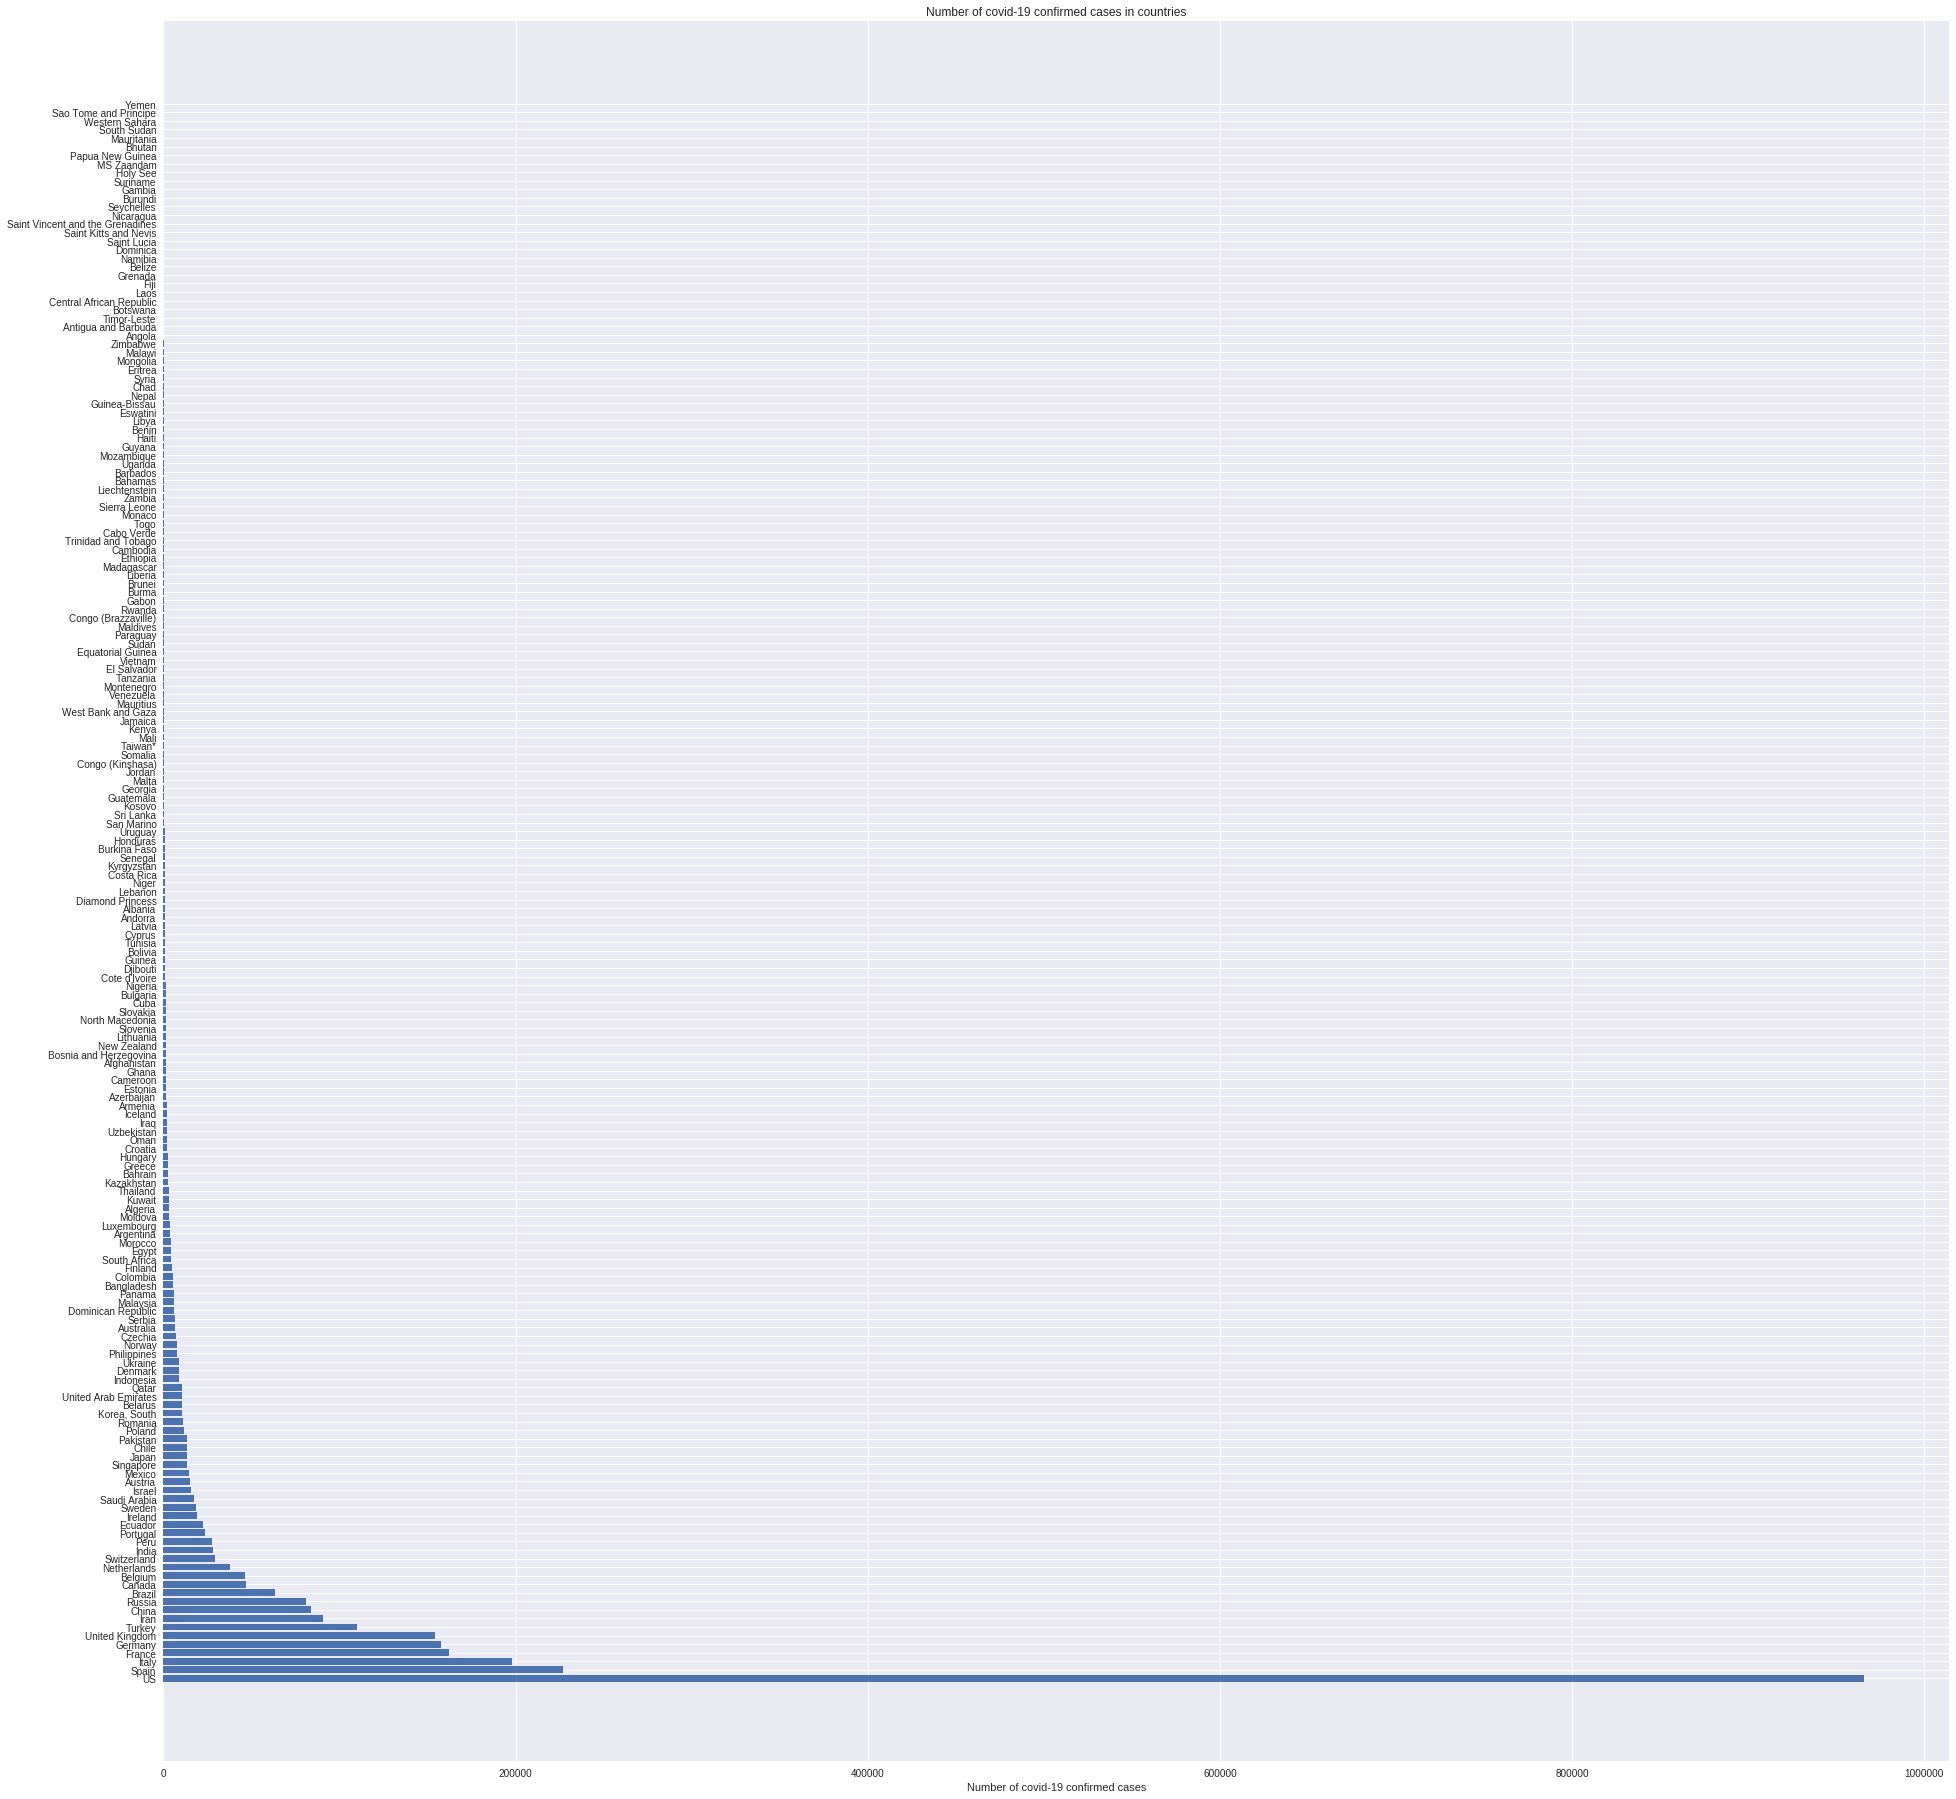

In [40]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of covid-19 confirmed cases in countries')
plt.xlabel('Number of covid-19 confirmed cases')
plt.show()

In [41]:
#20 confirmed countries 

visual_unique_countries =[]
visual_confirmed_cases=[]

others= np.sum(country_confirmed_cases[20:])
for i in range(len(country_confirmed_cases[:20])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])


    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)


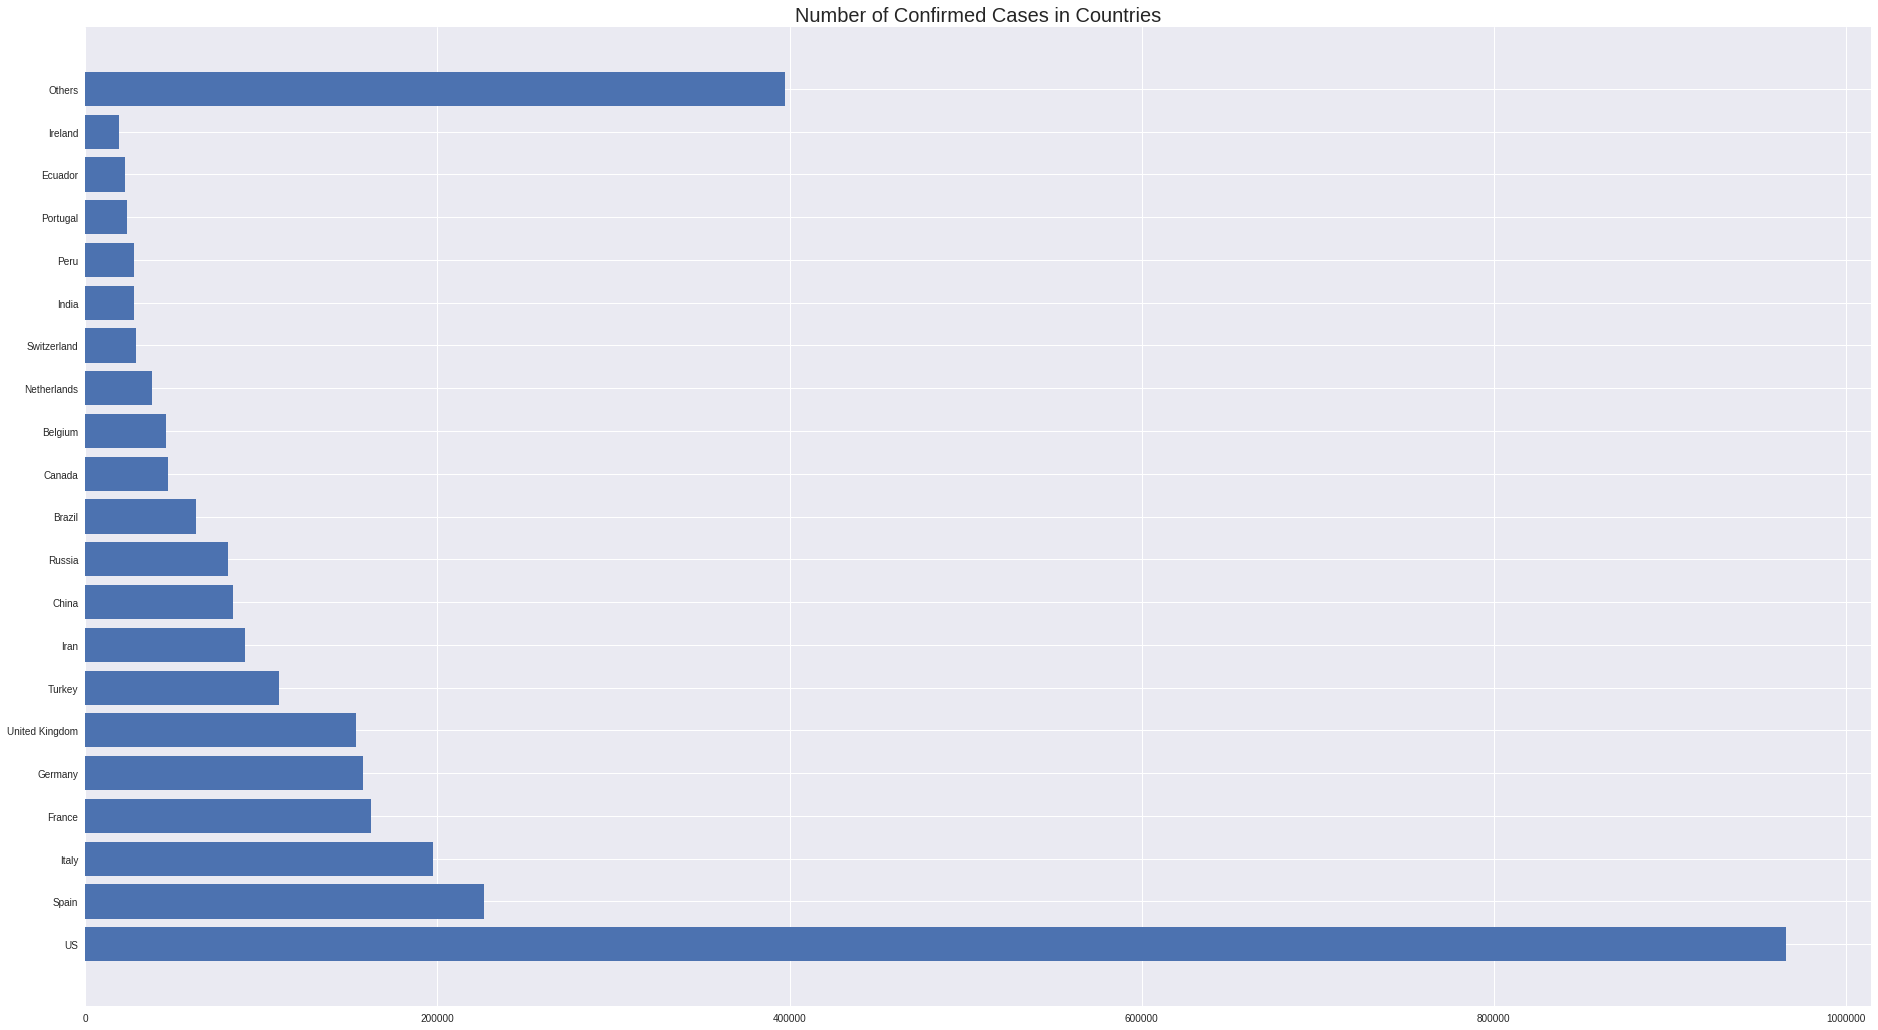

In [42]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of Confirmed Cases in Countries',size=20)
plt.show()

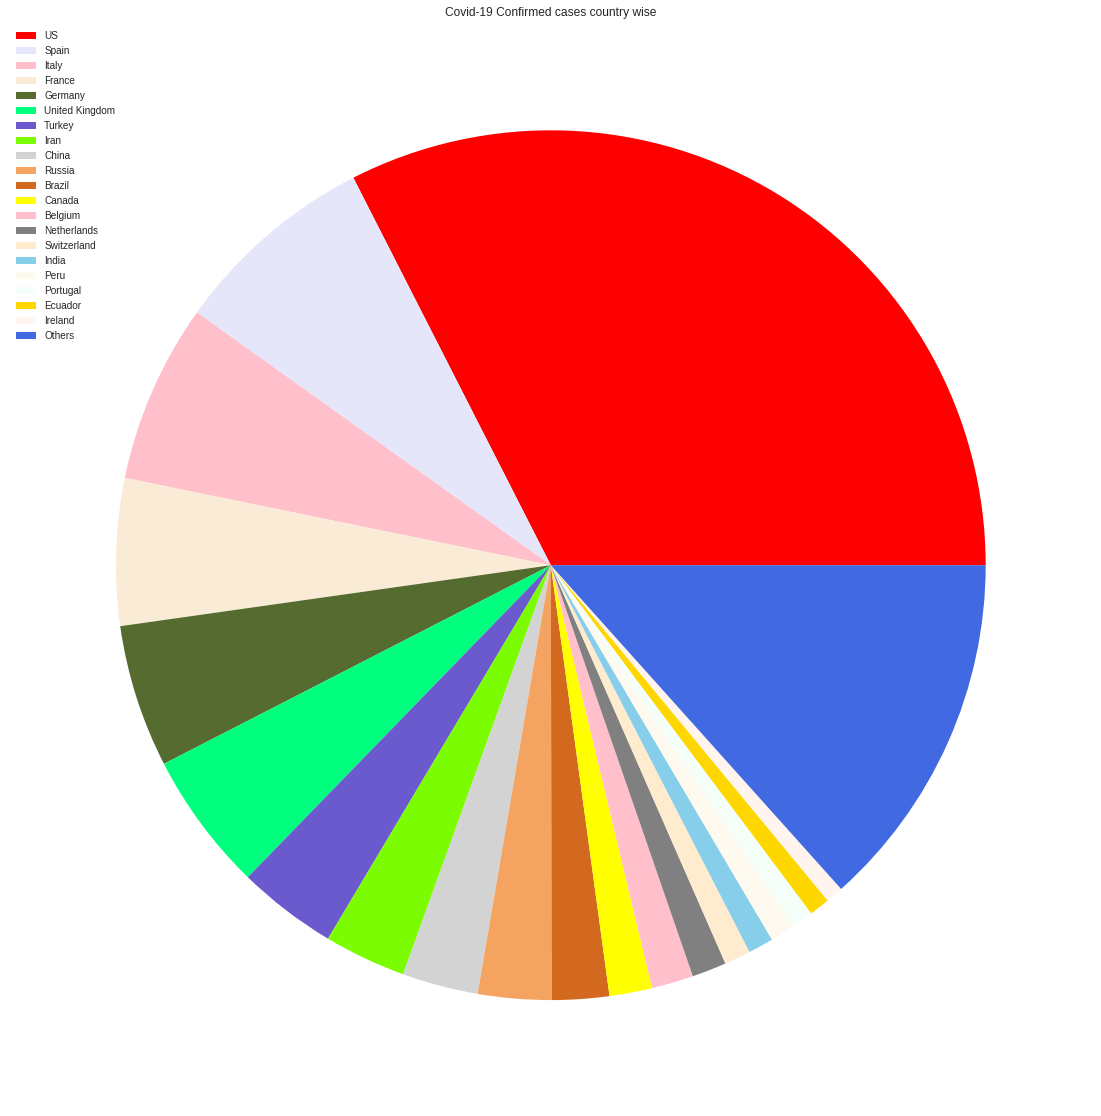

In [43]:
#pie

c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed cases country wise')
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.show()

In [149]:
X=adjusted_dates
y=world_cases

In [150]:
# Split the dataset into the training set and test set
xTrain_confirmed, xTest_confirmed, yTrain_confirmed, yTest_confirmed = train_test_split(X, y, test_size = .20, random_state = 0)

In [153]:
X=xTrain_confirmed
y=yTrain_confirmed

In [157]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

In [158]:
#Svm

kernel=['poly','sigmoid','rbf']
c=[.01,.1,1,10]
gamma=[.01,.1,1]
epsilon=[.01,.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm=SVR()

svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X,y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   31.0s finished
/home/shrut/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shrut/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [159]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 10}

In [192]:
forecast=[[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

In [193]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(forecast)

In [194]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [195]:
svm_pred

array([2781680.08095887, 2868961.42080262, 2958042.32705262,
       3048941.13955262, 3141676.22549012, 3236265.95986512,
       3332728.69033387, 3431082.79189637, 3531346.62783387,
       3633538.54189637])

In [208]:
X=xTrain_confirmed
y=yTrain_confirmed

In [209]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

In [210]:
svm_pred=svm_confirmed.predict(X)

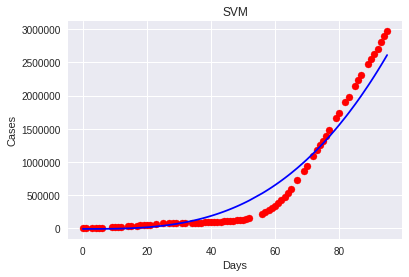

In [212]:
plt.scatter(X, y, color='red')
plt.plot(X,svm_pred, color='blue')
plt.title('SVM')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

In [213]:
X=xTest_confirmed
y=yTest_confirmed

In [214]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

In [215]:
svm_pred=svm_confirmed.predict(X)

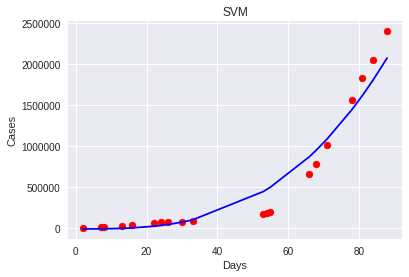

In [216]:
plt.scatter(X, y, color='red')
plt.plot(X,svm_pred, color='blue')
plt.title('SVM')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

In [197]:
from sklearn.linear_model import LinearRegression

In [125]:
X=adjusted_dates
y=world_cases

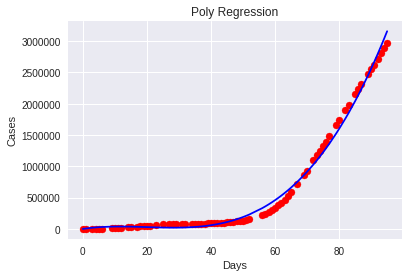

In [207]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly Regression')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

In [129]:
# Split the dataset into the training set and test set
xTrain_confirmed, xTest_confirmed, yTrain_confirmed, yTest_confirmed = train_test_split(X, y, test_size = .30,random_state=0)

In [130]:
X=xTrain_confirmed
y=yTrain_confirmed

In [141]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

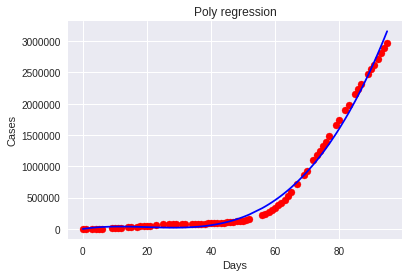

In [205]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly regression')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

In [132]:
X=xTest_confirmed
y=yTest_confirmed

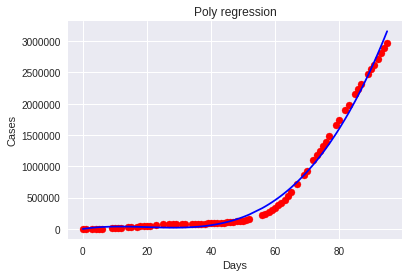

In [206]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly regression')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

In [171]:
pol_reg.predict(poly_reg.fit_transform([[97]]))

array([[3422424.78222145]])

In [172]:
forecast=[[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

In [174]:
type(forecast)

list

In [175]:
forecast=np.array(forecast)

In [176]:
type(forecast)

numpy.ndarray

In [181]:
z=pol_reg.predict(poly_reg.fit_transform(forecast))

In [191]:
z

array([[3422424.78222145],
       [3559541.71532199],
       [3700259.63740401],
       [3844624.69224271],
       [3992683.02361329],
       [4144480.77529095],
       [4300064.0910509 ],
       [4459479.11466834],
       [4622771.98991846],
       [4789988.86057648]])

In [218]:
X=adjusted_dates
y=total_deaths

In [219]:
# Split the dataset into the training set and test set
xTrain_confirmed, xTest_confirmed, yTrain_confirmed, yTest_confirmed = train_test_split(X, y, test_size = .20, random_state = 0)

In [220]:
X=xTrain_confirmed
y=yTrain_confirmed

In [221]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

In [222]:
#Svm

kernel=['poly','sigmoid','rbf']
c=[.01,.1,1,10]
gamma=[.01,.1,1]
epsilon=[.01,.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm=SVR()

svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X,y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.4min finished
/home/shrut/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shrut/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [223]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 0.1}

In [224]:
forecast=[[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

In [225]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(forecast)

In [226]:
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [227]:
svm_pred

array([202418.847556  , 208986.38564194, 215689.3323735 , 222529.06891525,
       229506.97746933, 236624.43973434, 243882.83705795, 251283.55136764,
       258827.96466721, 266517.45818222])

In [240]:
X=xTrain_confirmed
y=yTrain_confirmed

In [241]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

In [242]:
svm_pred=svm_confirmed.predict(X)

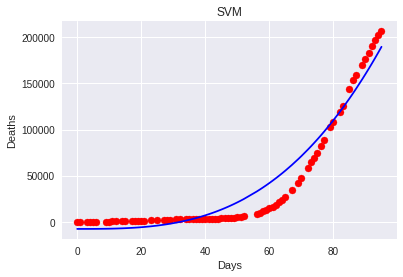

In [243]:
plt.scatter(X, y, color='red')
plt.plot(X,svm_pred, color='blue')
plt.title('SVM')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()

In [244]:
X=xTest_confirmed
y=yTest_confirmed

In [245]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

In [246]:
svm_pred=svm_confirmed.predict(X)

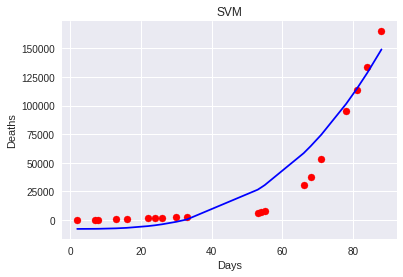

In [247]:
plt.scatter(X, y, color='red')
plt.plot(X,svm_pred, color='blue')
plt.title('SVM')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()

In [248]:
X=adjusted_dates
y=total_deaths

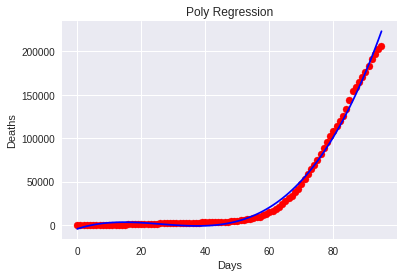

In [249]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly Regression')
    plt.xlabel('Days')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_polymonial()

In [251]:
#Split the dataset into the training set and test set
xTrain_confirmed, xTest_confirmed, yTrain_confirmed, yTest_confirmed = train_test_split(X, y, test_size = .30,random_state=0)

In [252]:
X=xTrain_confirmed
y=yTrain_confirmed

In [253]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

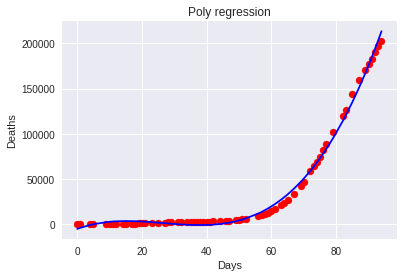

In [254]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly regression')
    plt.xlabel('Days')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_polymonial()

In [257]:
X=xTest_confirmed
y=yTest_confirmed

In [258]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

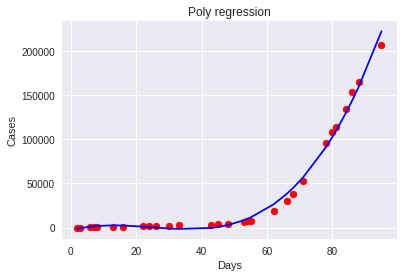

In [259]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly regression')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

In [260]:
pol_reg.predict(poly_reg.fit_transform([[97]]))

array([[242967.3506309]])

In [261]:
forecast=[[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

In [262]:
type(forecast)

list

In [263]:
forecast=np.array(forecast)

In [265]:
z=pol_reg.predict(poly_reg.fit_transform(forecast))
z

array([[242967.3506309 ],
       [253722.92002307],
       [264783.23595598],
       [276152.45062238],
       [287834.71621506],
       [299834.18492678],
       [312155.00895032],
       [324801.34047844],
       [337777.33170392],
       [351087.13481953]])

In [266]:
confirmed_cases['Country/Region']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
259                   France
260              South Sudan
261           Western Sahara
262    Sao Tome and Principe
263                    Yemen
Name: Country/Region, Length: 264, dtype: object

In [268]:
df=confirmed_cases[confirmed_cases['Country/Region']=='India']

In [ ]:
df

In [269]:
df_result=df.loc[:,cols[4]:cols[-1]]


In [270]:
df_result

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
131,0,0,0,0,0,0,0,0,1,1,...,14352,15722,17615,18539,20080,21370,23077,24530,26283,27890


In [271]:
df_final = np.array(df_result).reshape(-1,1)

In [272]:
df_final

array([[    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    1],
       [    1],
       [    1],
       [    2],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    3],
       [    5],
       [    5],
       [   28],
       [   30],
       [   31],
       [   34],
       [   39],
       [   43],
       [   56],
       [   62],
       [   73],
       [   82],
       [  102],
       [  113],
       [  119],
       [  142],
       [  156],
       [  194],
       [  244],
       [  330],
       [  396],
       [  499],
       [

In [273]:
X=adjusted_dates
y=df_final

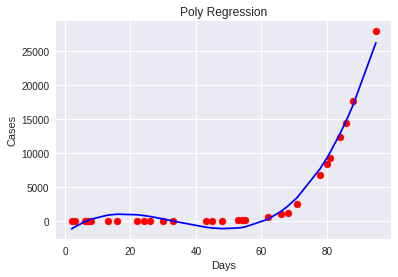

In [287]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly Regression')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

In [275]:
# Split the dataset into the training set and test set
xTrain_confirmed, xTest_confirmed, yTrain_confirmed, yTest_confirmed = train_test_split(X, y, test_size = .30,random_state=0)

In [276]:
X=xTrain_confirmed
y=yTrain_confirmed

In [277]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

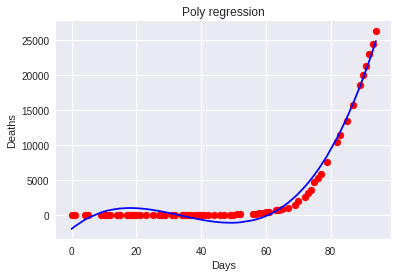

In [278]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly regression')
    plt.xlabel('Days')
    plt.ylabel('Deaths')
    plt.show()
    return
viz_polymonial()

In [279]:
X=xTest_confirmed
y=yTest_confirmed

In [280]:
X=np.sort(X,axis=0)
y=np.sort(y,axis=0)

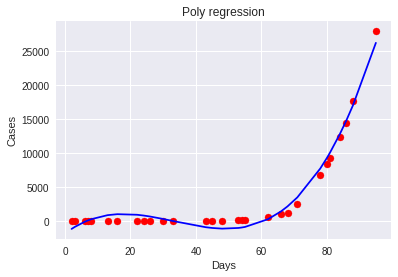

In [281]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Poly regression')
    plt.xlabel('Days')
    plt.ylabel('Cases')
    plt.show()
    return
viz_polymonial()

In [282]:
pol_reg.predict(poly_reg.fit_transform([[97]]))

array([[29256.66129845]])

In [283]:
forecast=[[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

In [284]:
forecast=np.array(forecast)

In [285]:
z=pol_reg.predict(poly_reg.fit_transform(forecast))
z

array([[29256.66129845],
       [30872.25299877],
       [32541.93429924],
       [34266.54329244],
       [36046.91807094],
       [37883.89672731],
       [39778.31735414],
       [41731.01804399],
       [43742.83688944],
       [45814.61198308]])